## Decision Trees

At each node, a split on the data is performed based on one of the input features, generating **two or more** branches as output.  Each internal node of the tree corresponds to an **attribute**, and each leaf node corresponds to a class label.
The primary challenge in the decision tree implementation is to identify which attributes do we need to consider as the root node and each level. Handling this is know the **attributes selection**. We have different attributes selection measure to identify the attribute which can be considered as the root note at each level.

<p align="center">
<img  src="decision_tree_scheme.png" width="600" height="600" />
</p>

### Types of Decision Trees

 
Types of decision trees are based on the type of target variable we have. It can be of two types:

- **Categorical Variable (classification)**: Decision Tree which has a categorical *target variable* then it called a Categorical variable decision tree. 
- **Continuous Variable (regression)**: Decision Tree has a continuous *target variable* then it is called Continuous Variable Decision Tree. 



### Attribute Selection Measures

Theese measures are used to select which attribute to use as a split **for each node** in the tree. We would like to select for each node the attribute that is most useful for classifying examples. We use this measures to select among candidates attributes at each step while growing the tree. (see the coding example with an image later).

- **Information gain (Entropy)**,

$$
\begin{aligned}
 E(S) &= -\sum_i p_i \log p_i  \\
 E(T,X) &= \sum_{c\in X}P(c)E(c) \\
 \text{Info Gain} &\equiv E(T) - E(T,X)
\end{aligned}
$$
The entropy measures the homogeneity of examples.

- **Gini index**,

$$
\text{Gini} =  1 - \sum_i p_i^2 = \sum_i p_i (1-p_i) = \sum_i p_i \times p(\text{missclasyifing class i} \mid \text{class i}) = p(\text{missclassification})
$$
- **Gain Ratio**,

$$
\text{Gain ratio} =  \frac{\text{Info Gain}}{\text{Split info}} = \frac{\text{Entropy(before)} - \sum_{j=1}^K \text{Extropy(j,after)}}{\sum_{j=1}^K w_j \log w_j}
$$
- **Reduction in Variance**
- **Chi-Square**

### Algorithms:

- ID3 (Quinlan 1986) -> Information gain (entropy)
- CART -> Gini index
- C4.5 (Quinlan 1993) -> Gain ratio
- CHAID -> Chi square

### Links 

- [How decision tree algorithm works](https://dataaspirant.com/how-decision-tree-algorithm-works/)

- [Chapter 3 - Decision tree learning](https://www.cs.princeton.edu/courses/archive/spr07/cos424/papers/mitchell-dectrees.pdf#page=10)

- [Decision tree algorithm explained](https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html#:~:text=Decision%20trees%20use%20multiple%20algorithms,homogeneity%20of%20resultant%20sub%2Dnodes.&text=The%20decision%20tree%20splits%20the,in%20most%20homogeneous%20sub%2Dnodes.)

- [Gini impurity explained](https://victorzhou.com/blog/gini-impurity/)

- [random forest regression vs linear regression](https://neptune.ai/blog/random-forest-regression-when-does-it-fail-and-why)

- [How is a splitting point chosen for continuous variables in Decision Trees?](https://www.youtube.com/watch?v=OD8aO4ovIBo&ab_channel=BhaveshBhatt)

- [Why the decision tree structure is only binary for sklearn decisiontreeclass (stackoverflow)](https://stackoverflow.com/questions/38931245/why-the-decision-tree-structure-is-only-binary-tree-for-sklearn-decisiontreeclas)

- [Why are implementations of decision tree algorithms usually binary and what are the advantages of the different impurity metrics?](https://sebastianraschka.com/faq/docs/decision-tree-binary.html#why-are-implementations-of-decision-tree-algorithms-usually-bina)

**Advantages**:
- Decision Trees are **easy to explain**. It results in a set of rules.
- It follows the same approach as humans generally follow while making decisions.
- **Interpretation** of a complex Decision Tree model can be simplified by its visualizations. Even a naive person can understand logic.
- **The Number of hyper-parameters to be tuned is almost null**.

**Disadvantages**:
- There is a high probability of **overfitting** in Decision Tree. Decision trees can learn a training set to a point of high granularity that makes them easily overfit. Allowing a decision tree to split to a granular degree, is the behavior of this model that makes it prone to learning every point extremely well — to the point of perfect classification — ie: overfitting.
- Generally, it gives **low prediction accuracy** for a dataset as compared to other machine learning algorithms.
- Information gain in a decision tree with categorical variables gives a biased response for attributes with greater no. of categories.
- Calculations can become complex when there are many class labels.

### Pruning

Turning branch nodes into leave nodes. Some accuracy is lost in the training set but it helps to generalization as decision trees tend to overfit.

<p align="center">
<img  src="pruning_decision_tree.jpeg" width="600" height="600" />
</p>


### Example (code)

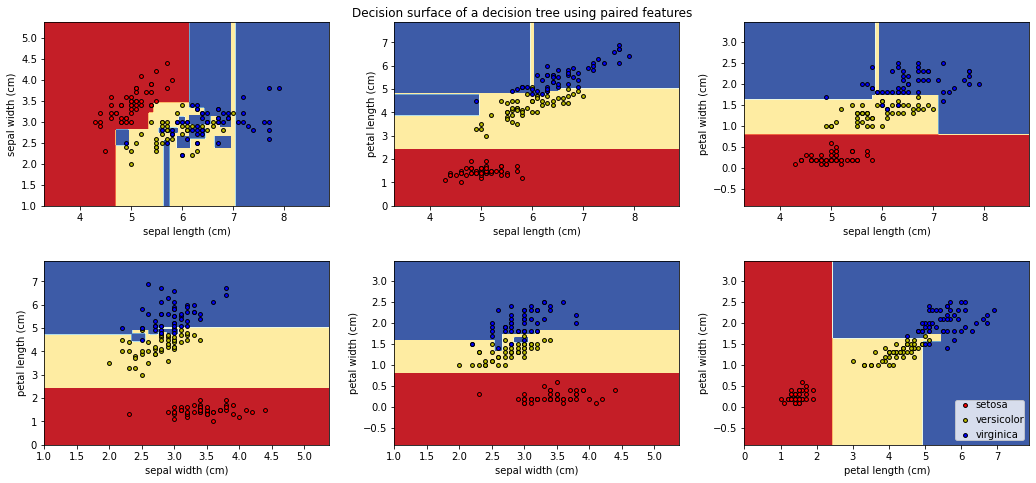

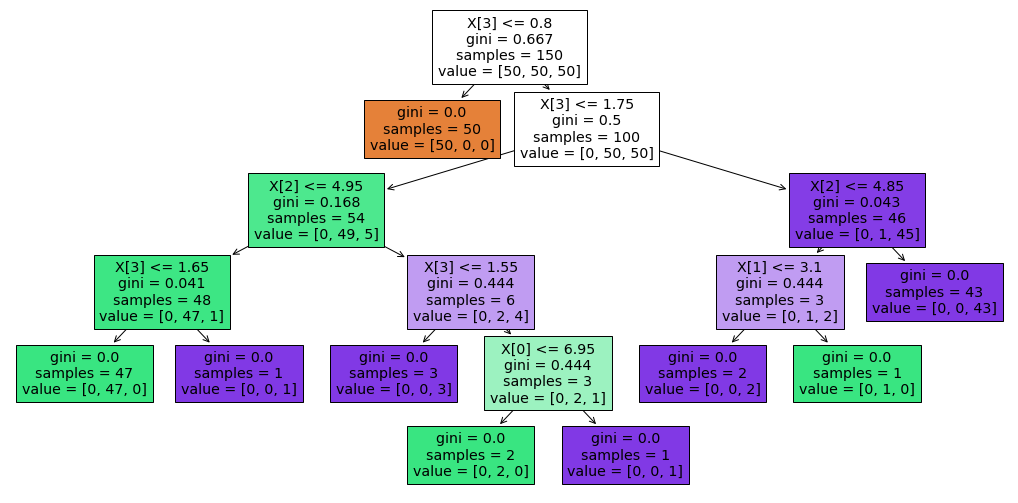

In [44]:
#  Original Code: https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

plt.figure(figsize=(15, 7))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=2, w_pad=2, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(18,9))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()


## Ensemble methods using decision trees

- **Random forests: bagging**
- **Boosting trees: sequential**

### Random Forest

A random forest is simply a collection of decision trees whose results are aggregated into one final result. Their ability to limit overfitting without substantially increasing error due to bias is why they are such powerful models.


One way Random Forests reduce variance is by *training on different samples of the data*. A second way is by *using a random subset of features*. This means if we have 30 features, random forests will only use a certain number of those features in each model, say five. Unfortunately, we have omitted 25 features that could be useful. But as stated, a random forest is a collection of decision trees. Thus, in each tree we can utilize five random features. If we use many trees in our forest, eventually many or all of our features will have been included. This inclusion of many features will help limit our error due to bias and error due to variance. If features weren’t chosen randomly, base trees in our forest could become highly correlated. This is because a few features could be particularly predictive and thus, the same features would be chosen in many of the base trees. If many of these trees included the same features we would not be combating error due to variance.


#### Links

- [Random forest - fastai](https://course18.fast.ai/lessonsml1/lesson2.html)
- [Random forest in python](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)
- [Random Forest Regression: When Does It Fail and Why?](https://neptune.ai/blog/random-forest-regression-when-does-it-fail-and-why)

### Boosting trees

Some examples are:

- [Gradient Boosting Machine (GBM)](https://en.wikipedia.org/wiki/Gradient_boosting)
- [Extreme Gradient Boosting Machine (XGBM)](https://xgboost.readthedocs.io/en/latest/tutorials/model.html)
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/)
- [Adaboost](https://www.mygreatlearning.com/blog/adaboost-algorithm/#:~:text=AdaBoost%20algorithm%2C%20short%20for%20Adaptive,weights%20to%20incorrectly%20classified%20instances)

#### Links

- [Gradient Boosting Explained - Dysplair](https://www.displayr.com/gradient-boosting-the-coolest-kid-on-the-machine-learning-block/#:~:text=Gradient%20boosting%20is%20a%20type,minimizes%20the%20overall%20prediction%20error.&text=reduce%20the%20error.-,If%20a%20small%20change%20in%20the%20prediction%20for%20a%20case,of%20the%20case%20is%20zero.)
- [Gradient boosting - Kaggle notebook](https://www.kaggle.com/grroverpr/gradient-boosting-simplified/)
- [Gradient boost (part 1) - youtube](https://www.youtube.com/watch?v=3CC4N4z3GJc&ab_channel=StatQuestwithJoshStarmer)
- [Introduction to boosted trees - XGBoost](https://xgboost.readthedocs.io/en/latest/tutorials/model.html)

Machine learning boosting is a method for creating an ensemble. It starts by fitting an initial model (e.g. a tree or linear regression) to the data. Then a second model is built that focuses on accurately predicting the cases where the first model performs poorly. The combination of these two models is expected to be better than either model alone. Then you repeat this process of boosting many times.  Each successive model attempts to correct for the shortcomings of the combined boosted ensemble of all previous models.

The gradient boosting method assumes a real-valued $y$ and seeks an approximation $\hat{F}(x)$ in the form of a weighted sum of functions $h_i (x)$ from some class $\mathcal{H}$ (in this case decision trees), called base (or weak) learners:

$$\hat{F}(x) = \sum_{i=1}^M \gamma_i f_i(x) + \mbox{const}.$$

#### Gradient boost algorithm

Choose a suitable loss function $L(y, f(x))$. In the case of regression you can use MSE, in the case of classification binary cross entropy is a better choice.

- Initialize model with a constant function $f_0(x) = \text{constant} \equiv \gamma \, , \forall x $  and solve the following optimization problem:  $f_0(x) \equiv \underset{\gamma}{\operatorname{argmin}}\sum_i L(y_i, \gamma)$,

$$
\begin{aligned}
\text{(MSE)}: &\quad  \frac{dL}{df} = 0 \leftrightarrow f_0(x) = \gamma = \frac{1}{N}\sum_{i}y_i\\
\text{(Cross-entropy)}: &\quad  \frac{dL}{df} = 0 \leftrightarrow f_0(x) = \gamma = \frac{\sum_{i}y_i}{\sum_i [y_1 + (1-y_i)]} = \frac{1}{N}\sum_{i}y_i
\end{aligned}
$$

**Loop, $m = 1, \ldots , M$**
- Generate $m$th tree.

- Compute **(pseudo)residuals**: 
$$
r_{im} = - \left( \frac{\partial L (y_i, f(x_i))}{\partial f(x_i)}  \right)_{f(x)= f_{m-1}(x)}\, , \quad i = 1,\ldots, N
$$


- Make the tree fit these residuals, i.e. the new targets $y_i$ are actually the residuals $r_{im}$ (remember $m$ is fixed here). Equivalently the data is $\{ (x_i,r_{im})\}_{i=1}^N$


- Compute **output value**:
$$
\gamma_{jm} = \underset{\gamma}{\operatorname{argmin}} \sum_{x_i \in R_{jm}}L(y_i, f_{m-1}(x_i) + \gamma)\, , \quad \text{again remember that m is fixed}
$$
where the subindices of $R$ are the leave node and tree respectively. So $R_{12}$ is the set of values in the first leave of second tree. In the case of a MSE loss function, this minimization problem is almost straightforward. For othe loss functions instead, this gets harder. Therefore we are going to Taylor expand the loss function to second order in $\gamma$:
$$
L(y, f_{m-1}(x)+\gamma) = L(y, f_{m-1}(x)) + \frac{dL(y, f_{m-1}(x))}{df}\gamma + \frac{1}{2}\frac{d^2L(y, f_{m-1}(x))}{df^2}\gamma^2 + O(\gamma^3)
$$
$$
\implies \gamma_{jm} = -\sum_{x_i \in R_{jm}}\left(\frac{dL(y_i, f_{m-1}(x_i))}{df}\right)\left({\frac{d^2L(y_i, f_{m-1}(x_i))}{df^2}}\right)^{-1}
$$
- Update 
$$
f_m (x) = f_{m-1}(x) + \nu \sum_{j=1}^{J_m}\gamma_{jm}I(x\in R_{jm})  
$$
where $I(x\in R_{jm})$ is the [indicator notation](https://en.wikipedia.org/wiki/Indicator_notation).







